# Probability

In [1]:
from scipy import stats
import numpy as np

### Mass Function

In [2]:
# Let's model support tickets per hour using a Poisson distribution
lambda_rate = 5  # Average 5 tickets per hour

# Calculate probability of exactly k tickets in an hour
def ticket_probability(k):
    return stats.poisson.pmf(k, lambda_rate)

In [3]:
# Probability of exactly 3 tickets
ticket_probability(3)

0.1403738958142805

### Density Function

In [4]:
# Model response times using a normal distribution
mean_response = 100  # milliseconds
std_dev = 15

# Calculate relative likelihood of different response times
def response_likelihood(x):
    return stats.norm.pdf(x, mean_response, std_dev)

In [5]:
# Compare likelihood of different response times
print(f"Likelihood at 100ms: {response_likelihood(100):.4f}")
print(f"Likelihood at 130ms: {response_likelihood(130):.4f}")

Likelihood at 100ms: 0.0266
Likelihood at 130ms: 0.0036


### Cummulative Distribution Function

In [6]:
# Model response times using a normal distribution
mean_response = 100  # milliseconds
std_dev = 15

# Calculate probability of response time being under a threshold
def probability_under_threshold(threshold):
    return stats.norm.cdf(threshold, mean_response, std_dev)

In [8]:
# Probability of response time under 120ms
probability_under_threshold(120)

0.9087887802741321

### Quantile Function or Point Percentile

In [9]:
# Model response times using a normal distribution
mean_response = 100  # milliseconds
std_dev = 15

# Find the response time threshold for a given percentile
def find_response_threshold(percentile):
    return stats.norm.ppf(percentile, mean_response, std_dev)

In [11]:
# Find 95th percentile response time
find_response_threshold(0.95)

124.67280440427209

### Example

Distribution Analysis Results:
Mean: 100.05
Standard Deviation: 15.06
Percentage within 1σ: 68.2%
Percentage within 2σ: 94.9%
Percentage within 3σ: 99.7%
Probability of value < μ + 1σ: 0.841


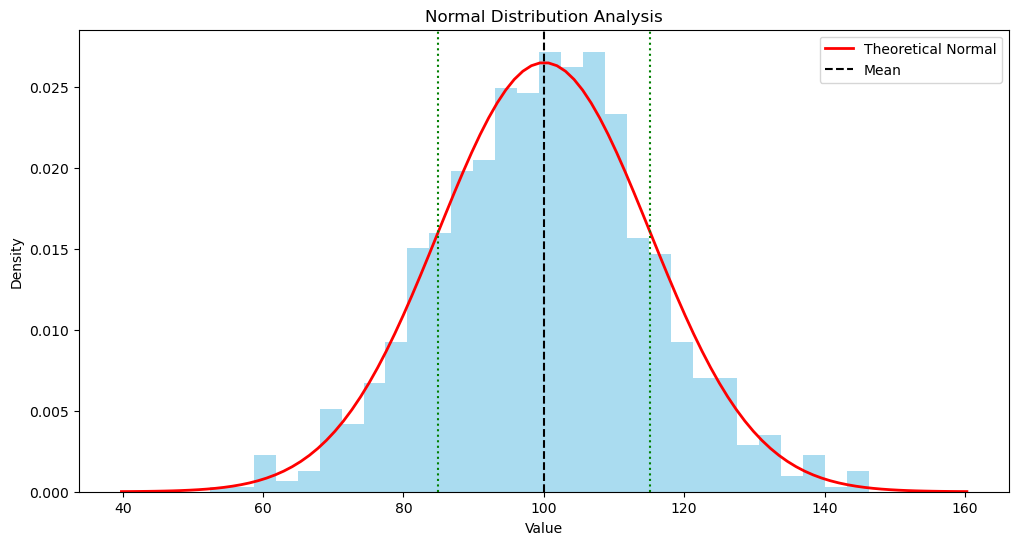

In [12]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

def demonstrate_normal_distribution():
    """
    Demonstrates key concepts of Normal Distribution in programming contexts.
    Shows generation, analysis, and visualization of normally distributed data.
    """
    # 1. Generating normally distributed data
    # Generate 1000 samples with mean=100 and std=15
    samples = np.random.normal(loc=100, scale=15, size=1000)
    
    # 2. Analyzing the distribution
    mean = np.mean(samples)
    std = np.std(samples)
    
    # 3. Calculate empirical rule boundaries
    one_sigma = (mean - std, mean + std)
    two_sigma = (mean - 2*std, mean + 2*std)
    three_sigma = (mean - 3*std, mean + 3*std)
    
    # 4. Calculate actual percentages within each boundary
    within_one = np.mean(np.abs(samples - mean) <= std) * 100
    within_two = np.mean(np.abs(samples - mean) <= 2 * std) * 100
    within_three = np.mean(np.abs(samples - mean) <= 3 * std) * 100
    
    # 5. Transform to standard normal (z-scores)
    z_scores = stats.zscore(samples)
    
    # 6. Calculate probabilities using cumulative distribution function (CDF)
    # Example: Probability of value being less than mean + 1 std
    prob_less_than_one_sigma = stats.norm.cdf(mean+std, loc=mean, scale=std)
    
    # 7. Visualization
    plt.figure(figsize=(12, 6))
    
    # Create histogram of original data
    plt.hist(samples, bins=30, density=True, alpha=0.7, color='skyblue')
    
    # Add theoretical normal curve
    x = np.linspace(mean - 4*std, mean + 4*std, 100)
    plt.plot(x, stats.norm.pdf(x, mean, std), 'r-', lw=2, 
             label='Theoretical Normal')
    
    # Add vertical lines for standard deviations
    plt.axvline(mean, color='black', linestyle='--', label='Mean')
    plt.axvline(one_sigma[0], color='green', linestyle=':')
    plt.axvline(one_sigma[1], color='green', linestyle=':')
    
    plt.title('Normal Distribution Analysis')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()
    
    return {
        'mean': mean,
        'std': std,
        'within_one_sigma': within_one,
        'within_two_sigma': within_two,
        'within_three_sigma': within_three,
        'prob_less_than_one_sigma': prob_less_than_one_sigma
    }

# Run the demonstration
results = demonstrate_normal_distribution()

# Print analysis results
print(f"Distribution Analysis Results:")
print(f"Mean: {results['mean']:.2f}")
print(f"Standard Deviation: {results['std']:.2f}")
print(f"Percentage within 1σ: {results['within_one_sigma']:.1f}%")
print(f"Percentage within 2σ: {results['within_two_sigma']:.1f}%")
print(f"Percentage within 3σ: {results['within_three_sigma']:.1f}%")
print(f"Probability of value < μ + 1σ: {results['prob_less_than_one_sigma']:.3f}")

### Example

In [13]:
# Sample measurements from the production line (500 screens)
measurements = np.random.normal(loc=0.5, scale=0.02, size=500)

# Calculate basic statistics
mean_thickness = np.mean(measurements)
std_thickness = np.std(measurements)

In [14]:
print(f"Mean thickness: {mean_thickness:.3f}mm")
print(f"Standard deviation: {std_thickness:.3f}mm")

Mean thickness: 0.499mm
Standard deviation: 0.020mm


In [15]:
# Calculate boundaries using the 68-95-99.7 rule
one_sigma = (mean_thickness - std_thickness, mean_thickness + std_thickness)
two_sigma = (mean_thickness - 2*std_thickness, mean_thickness + 2*std_thickness)
three_sigma = (mean_thickness - 3*std_thickness, mean_thickness + 3*std_thickness)

In [16]:
print("\nQuality Control Boundaries:")
print(f"68% of screens between: {one_sigma[0]:.3f}mm and {one_sigma[1]:.3f}mm")
print(f"95% of screens between: {two_sigma[0]:.3f}mm and {two_sigma[1]:.3f}mm")
print(f"99.7% of screens between: {three_sigma[0]:.3f}mm and {three_sigma[1]:.3f}mm")


Quality Control Boundaries:
68% of screens between: 0.479mm and 0.519mm
95% of screens between: 0.460mm and 0.539mm
99.7% of screens between: 0.440mm and 0.558mm


In [19]:
def analyze_process_capability(data, lower_spec, upper_spec):
    # Convert measurements to z-scores relative to specifications
    mean = np.mean(data)
    std = np.std(data)
    
    z_lower = (lower_spec - mean) / std
    z_upper = (upper_spec - mean) / std
    
    # Calculate probability of defects
    prob_below = stats.norm.cdf(z_lower)
    prob_above = 1 - stats.norm.cdf(z_upper)
    total_defect_rate = (prob_below + prob_above) * 100
    
    return total_defect_rate

defect_rate = analyze_process_capability(measurements, lower_spec=0.45, upper_spec=0.55)

defect_rate

1.1100895924632945

In [23]:
def analyze_small_batch(measurements, confidence=0.95):
    n = len(measurements)
    mean = np.mean(measurements)
    std_error = stats.sem(measurements)
    
    # Use t-distribution for small sample
    confidence_interval = stats.t.interval(confidence, df=n-1, loc=mean, scale=std_error)
    
    return confidence_interval

# Analyze a small batch of 10 screens
small_batch = measurements[:10]
ci = analyze_small_batch(small_batch)
print(f"\nSmall Batch Analysis:")
print(f"95% Confidence Interval: {ci[0]:.3f}mm to {ci[1]:.3f}mm")


Small Batch Analysis:
95% Confidence Interval: 0.496mm to 0.517mm
